JW Test Code

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("../")
sys.path.append("../..")

# Data Integration1 - Input : DataSet

## 1. Data Preparation

### Make 3 Numeric Test Data with different frequencies

In [2]:
r_0 = pd.date_range(start='1/3/2018', end= '1/05/2018', freq='10T')
r_1 = pd.date_range(start='1/2/2018', end= '1/09/2018', freq='7T')
r_2 = pd.date_range(start='1/1/2018', end= '1/07/2018', freq='3T')
data_0 = {'datetime': r_0,
          'data0':np.random.randint(0, 100, size=(len(r_0)))}
data_1 = {'datetime': r_1,
          'data1':np.random.randint(0, 100, size=(len(r_1)))}
data_2 = {'datetime': r_2,
          'data2':np.random.randint(0, 100, size=(len(r_2)))}

df0 = pd.DataFrame (data = data_0).set_index('datetime')
df1 = pd.DataFrame (data = data_1).set_index('datetime')
df2 = pd.DataFrame (data = data_2).set_index('datetime')
data_partial_numeric = {0:df0, 1:df1, 2:df2}

In [3]:
data_partial_numeric

{0:                      data0
 datetime                  
 2018-01-03 00:00:00     77
 2018-01-03 00:10:00     59
 2018-01-03 00:20:00     70
 2018-01-03 00:30:00     79
 2018-01-03 00:40:00      8
 ...                    ...
 2018-01-04 23:20:00     14
 2018-01-04 23:30:00     76
 2018-01-04 23:40:00     40
 2018-01-04 23:50:00     47
 2018-01-05 00:00:00     67
 
 [289 rows x 1 columns],
 1:                      data1
 datetime                  
 2018-01-02 00:00:00     67
 2018-01-02 00:07:00     32
 2018-01-02 00:14:00     52
 2018-01-02 00:21:00     35
 2018-01-02 00:28:00     77
 ...                    ...
 2018-01-08 23:32:00     77
 2018-01-08 23:39:00     38
 2018-01-08 23:46:00     92
 2018-01-08 23:53:00     37
 2018-01-09 00:00:00     94
 
 [1441 rows x 1 columns],
 2:                      data2
 datetime                  
 2018-01-01 00:00:00     25
 2018-01-01 00:03:00     37
 2018-01-01 00:06:00     36
 2018-01-01 00:09:00     99
 2018-01-01 00:12:00     43
 ...        

## 2. Integration Meta

In [4]:
from KETIPreDataIntegration.meta import partialDataInfo
partial_data_info = partialDataInfo.PartialData(data_partial_numeric)
overlap_duration = partial_data_info.column_meta['overlap_duration']
GCD = partial_data_info.partial_frequency_info['GCD']
GCDs = partial_data_info.partial_frequency_info['GCDs']

print("overlap:", overlap_duration)
print("GCD:", GCD)
print("GCDs:", GCDs)
partial_data_info.partial_frequency_info

IntType
IntType
IntType
[600, 420, 180]
overlap: {'start_time': Timestamp('2018-01-03 00:00:00'), 'end_time': Timestamp('2018-01-05 00:00:00')}
GCD: 60
GCDs: 60S


{'frequency_list': [600, 420, 180],
 'min_frequency': 180,
 'max_frequency': 600,
 'frequency_is_same': False,
 'average_frequency': 400.0,
 'median_frequency': 420.0,
 'GCD': 60,
 'GCDs': '60S'}

In [14]:
partial_data_info.column_meta

{'overlap_duration': {'start_time': Timestamp('2018-01-03 00:00:00'),
  'end_time': Timestamp('2018-01-05 00:00:00')},
 'column_characteristics': {'data0': {'column_name': 'data0',
   'column_frequency': Timedelta('0 days 00:10:00'),
   'column_type': dtype('int64'),
   'occurence_time': 'Continuous',
   'pointDependency': 'Yes',
   'upsampling_method': 'mean',
   'downsampling_method': 'mean'},
  'data1': {'column_name': 'data1',
   'column_frequency': Timedelta('0 days 00:07:00'),
   'column_type': dtype('int64'),
   'occurence_time': 'Continuous',
   'pointDependency': 'Yes',
   'upsampling_method': 'mean',
   'downsampling_method': 'mean'},
  'data2': {'column_name': 'data2',
   'column_frequency': Timedelta('0 days 00:03:00'),
   'column_type': dtype('int64'),
   'occurence_time': 'Continuous',
   'pointDependency': 'Yes',
   'upsampling_method': 'mean',
   'downsampling_method': 'mean'}}}

In [5]:
partial_data_info.partial_frequency_info

{'frequency_list': [600, 420, 180],
 'min_frequency': 180,
 'max_frequency': 600,
 'frequency_is_same': False,
 'average_frequency': 400.0,
 'median_frequency': 420.0,
 'GCD': 60,
 'GCDs': '60S'}

## 3. GCD에 의해서 변환한 후 합친 버젼

In [6]:
from KETIPrePartialDataPreprocessing.refinement.frequency import RefineFrequency
sameFDataSet = RefineFrequency().get_RefinedDataSetwithStaticFreq(data_partial_numeric, GCDs)
from KETIPreDataIntegration.meta import data_integration
data_int = data_integration.DataIntegration(sameFDataSet)
dintegrated_data = data_int.simple_integration(overlap_duration)
dintegrated_data

,data0,data1,data2
datetime,,,
2018-01-03 00:00:00,93.0,NaN,91.0
2018-01-03 00:01:00,NaN,NaN,NaN
2018-01-03 00:02:00,NaN,25.0,NaN
2018-01-03 00:03:00,NaN,NaN,1.0
2018-01-03 00:04:00,NaN,NaN,NaN
...,...,...,...
2018-01-04 23:56:00,NaN,NaN,NaN
2018-01-04 23:57:00,NaN,NaN,38.0
2018-01-04 23:58:00,NaN,NaN,NaN


## 4. 이렇게 안해도 될 것 같지만 여튼 integer로 변환한 버젼

In [7]:
new_dintegrated_data = dintegrated_data.copy()
new_index = (pd.to_numeric(dintegrated_data.index)/1000000000/60).astype(int)
new_index = new_index-new_index[0]
new_dintegrated_data.index = new_index
new_dintegrated_data

,data0,data1,data2
datetime,,,
0,93.0,NaN,91.0
1,NaN,NaN,NaN
2,NaN,25.0,NaN
3,NaN,NaN,1.0
4,NaN,NaN,NaN
...,...,...,...
2876,NaN,NaN,NaN
2877,NaN,NaN,38.0
2878,NaN,NaN,NaN


## 5. 고려대 Alignment Test 1

### Parameter

In [8]:
integrationParam = {
    "model": 'RNN_AE',
    "model_parameter": {
        "window_size": 10, # 모델의 input sequence 길이, int(default: 10, 범위: 0 이상 & 원래 데이터의 sequence 길이 이하)
        "emb_dim": 2, # 변환할 데이터의 차원, int(범위: 16~256)
        "num_epochs": 50, # 학습 epoch 횟수, int(범위: 1 이상, 수렴 여부 확인 후 적합하게 설정)
        "batch_size": 128, # batch 크기, int(범위: 1 이상, 컴퓨터 사양에 적합하게 설정)
        "learning_rate": 0.0001, # learning rate, float(default: 0.0001, 범위: 0.1 이하)
        "device": 'cpu' # 학습 환경, ["cuda", "cpu"] 중 선택
    }
}

### Test - getIntegratedDataSetByML 활용

In [9]:
## 현재 
from KETIPreDataIntegration.clustDataIntegration import ClustIntegration

alignment_result = ClustIntegration().getIntegratedDataSetByML(sameFDataSet, integrationParam, overlap_duration)

/home/hwangjisoo/바탕화면/Clust/KETIAppTestCode/../KETIPreDataIntegration/ML/RNN_AE/train_model.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.concatenate(np.array(result), 0)


In [10]:
alignment_result

,concat_emb1,concat_emb2
datetime,,
2018-01-03 00:10:00,0.113345,-0.091891
2018-01-03 00:11:00,0.150554,-0.136802
2018-01-03 00:12:00,0.149808,-0.129795
2018-01-03 00:13:00,0.189076,-0.110467
2018-01-03 00:14:00,0.182635,-0.130883
...,...,...
2018-01-04 23:56:00,0.147126,-0.119795
2018-01-04 23:57:00,0.146736,-0.120386
2018-01-04 23:58:00,0.192933,-0.100897


<AxesSubplot:xlabel='datetime'>

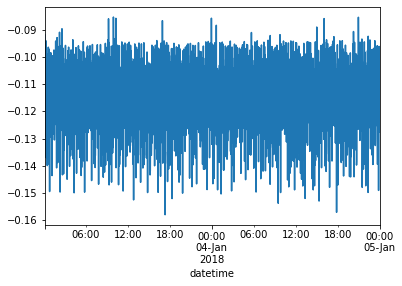

In [11]:
alignment_result.concat_emb2.plot()

# Data Integration2 - Input : DataInfo

## 고려대 Alignment Test 2

### parameter

In [12]:
start_time = "2021-03-10 00:00:00"
end_time = "2021-04-01 00:00:00"

intDataInfo = { "db_info":[ { "db_name":"air_indoor_어린이집", "measurement":"ICW0W2100043", "start":start_time, "end":end_time },
{ "db_name":"air_indoor_체육시설", "measurement":"ICL1L2000064", "start":start_time, "end":end_time}, 
{ "db_name":"air_indoor_도서관", "measurement":"ICW0W2000087", "start":start_time, "end":end_time }
] }


In [13]:
refine_param = {
    "removeDuplication":{"flag":False},
    "staticFrequency":{"flag":True, "frequency":""}
}
outlier_param  = {
    "certainErrorToNaN":{"flag":False},
    "unCertainErrorToNaN":{
        "flag":False
    }
}
imputation_param = {
    "serialImputation":{
        "flag":False
    }
}

process_param = {'refine_param':refine_param, 'outlier_param':outlier_param, 'imputation_param':imputation_param}

transformParam = {
    "model": 'RNN_AE',
    "model_parameter": {
        "window_size": 10, # 모델의 input sequence 길이, int(default: 10, 범위: 0 이상 & 원래 데이터의 sequence 길이 이하)
        "emb_dim": 5, # 변환할 데이터의 차원, int(범위: 16~256)
        "num_epochs": 50, # 학습 epoch 횟수, int(범위: 1 이상, 수렴 여부 확인 후 적합하게 설정)
        "batch_size": 128, # batch 크기, int(범위: 1 이상, 컴퓨터 사양에 적합하게 설정)
        "learning_rate": 0.0001, # learning rate, float(default: 0.0001, 범위: 0.1 이하)
        "device": 'cpu' # 학습 환경, ["cuda", "cpu"] 중 선택
    }
}

integration_param = {
    "granularity_sec":"",
    "transformParam":transformParam,
    "method":"ML"
}

In [14]:
integration_param

{'granularity_sec': '',
 'transformParam': {'model': 'RNN_AE',
  'model_parameter': {'window_size': 10,
   'emb_dim': 5,
   'num_epochs': 50,
   'batch_size': 128,
   'learning_rate': 0.0001,
   'device': 'cpu'}},
 'method': 'ML'}

### Test - clustIntegrationFromInfluxSource 활용

In [15]:
from KETIPreDataIntegration.clustDataIntegration import ClustIntegration

dataSet = ClustIntegration().clustIntegrationFromInfluxSource(db_client, intDataInfo, process_param, integration_param )

IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
[60, 60, 60]
self.refine_param ::  {'removeDuplication': {'flag': False}, 'staticFrequency': {'flag': True, 'frequency': '60S'}}
Refining-----End
OutlierProcessing-----End
Imputation-----End
Refining-----End
OutlierProcessing-----End
Imputation-----End
Refining-----End
OutlierProcessing-----End
Imputation-----End


/home/hwangjisoo/바탕화면/Clust/KETIAppTestCode/../KETIPreDataIntegration/ML/RNN_AE/train_model.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.concatenate(np.array(result), 0)


In [16]:
dataSet

,concat_emb1,concat_emb2,concat_emb3,concat_emb4,concat_emb5
datetime,,,,,
2021-03-26 09:08:00+00:00,-0.333563,0.083309,0.051008,0.158942,-0.262348
2021-03-26 09:09:00+00:00,-0.337051,0.083893,0.051302,0.159747,-0.262985
2021-03-26 09:10:00+00:00,-0.338872,0.084156,0.051389,0.160297,-0.262898
2021-03-26 09:11:00+00:00,-0.339871,0.084248,0.051410,0.160542,-0.262696
2021-03-26 09:12:00+00:00,-0.341310,0.084208,0.051304,0.159232,-0.263412
...,...,...,...,...,...
2021-03-31 18:22:00+00:00,-0.055302,0.182773,-0.097824,0.110691,-0.209693
2021-03-31 18:23:00+00:00,-0.054519,0.182695,-0.098444,0.110697,-0.211661
2021-03-31 18:24:00+00:00,-0.054112,0.182652,-0.098754,0.110718,-0.212927
